In [1]:
%matplotlib inline
import os
from PIL import Image
from PIL import ImageEnhance
import pandas as pd
import sys
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.pyplot import cm
from numpy import asarray
from itertools import combinations
from scipy import ndimage
from scipy.interpolate import RegularGridInterpolator
import matplotlib.animation as animation
import ipywidgets as widgets
import cv2 
import pyautogui
import scipy as sp
from ipywidgets import interact
from scipy.optimize import curve_fit
import imageio
from skimage import data
from skimage import color, morphology
import glob
from itertools import groupby
from operator import itemgetter

In [2]:
path = "gopro_data/0928/"
allfiles = glob.glob(path + "*")

In [3]:
def imageread(data, init, end):
    '''
    This function imports the images starting from init to end.  
    '''
    image = []
    [image.append(cv2.imread(file,cv2.IMREAD_GRAYSCALE)) for file in data[init:end+1]]
       
    return image

In [4]:
N = len(allfiles) # Number of all images 
images = imageread(allfiles, 0, N) # Read the chosen interval data 
col = 1800 # Target Column
f = 2 # sampling frequency: 2Hz 

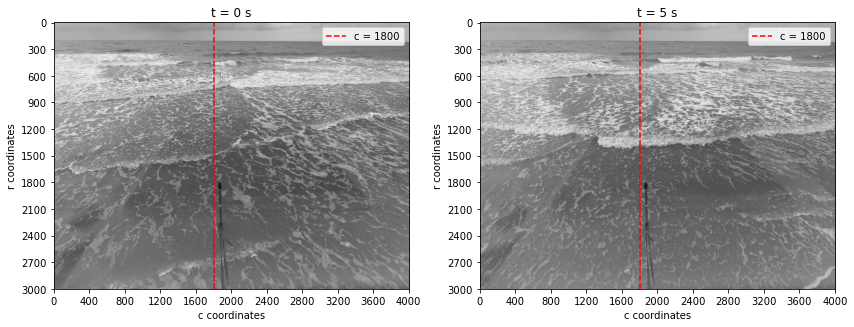

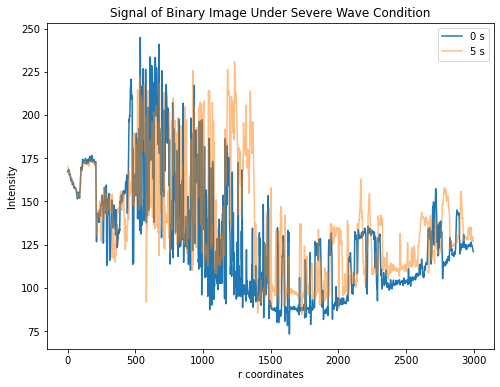

In [5]:
np.set_printoptions(threshold=sys.maxsize)
seq0 = 0
seq10 = 10
c_num = len(images[seq0][:,col])

r0 = []
for i in range(-5,6):
    r0.append(images[seq0][:,col+i])
r0_trans = np.transpose(r0)    
r0_ave = np.mean(r0_trans, axis=1)

r10 = []
for i in range(-5,6):
    r10.append(images[seq10][:,col+i])
r10_trans = np.transpose(r10)    
r10_ave = np.mean(r10_trans, axis=1)

xrange = np.arange(0,4400,400)
yrange = np.arange(0,3300,300)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14, 10))
ax1.set_title('t = 0 s')
ax1.imshow(images[seq0],cmap = 'gray')
ax1.axvline(x=col, label = 'c = 1800', linestyle = '--', color = 'r')
ax1.set_xlabel("c coordinates")
ax1.set_ylabel("r coordinates")
ax1.set_xticks(xrange)
ax1.set_yticks(yrange)
ax1.legend()

ax2.set_title('t = 5 s')
ax2.imshow(images[seq10],cmap = 'gray')
ax2.axvline(x=col, label = 'c = 1800', linestyle = '--', color = 'r')
ax2.set_xlabel("c coordinates")
ax2.set_ylabel("r coordinates")
ax2.set_xticks(xrange)
ax2.set_yticks(yrange)
ax2.legend()

# Plot Intensity Figure
plt.figure(figsize = (8,6))
plt.plot(range(c_num),r0_ave, label = '0 s')
plt.plot(range(c_num),r10_ave, label = '5 s', alpha = 0.5)
plt.title("Signal of Binary Image Under Severe Wave Condition")
plt.xlabel("r coordinates")
plt.ylabel("Intensity")
plt.legend()
plt.show()

# White Top Hat Transformation for Detecing Wave Bore

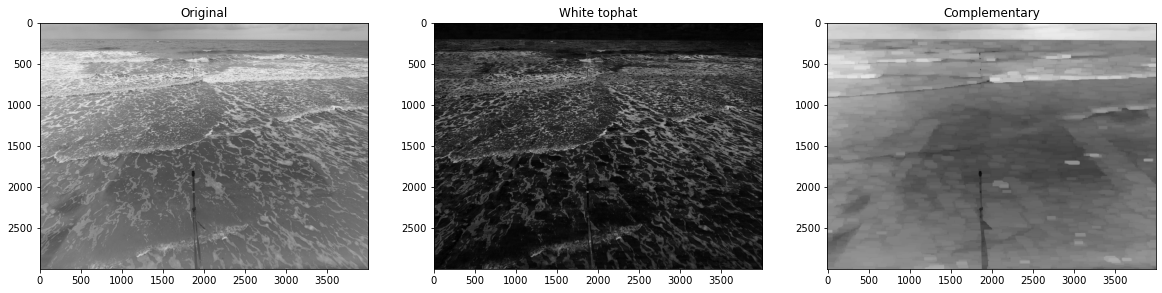

In [6]:
seq = 0

footprint = morphology.rectangle(30,100)
res = morphology.white_tophat(images[seq], footprint)

fig, ax = plt.subplots(ncols=3, figsize=(20, 8))
ax[0].set_title('Original')
ax[0].imshow(images[seq], cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(images[seq] - res, cmap='gray')

plt.show()

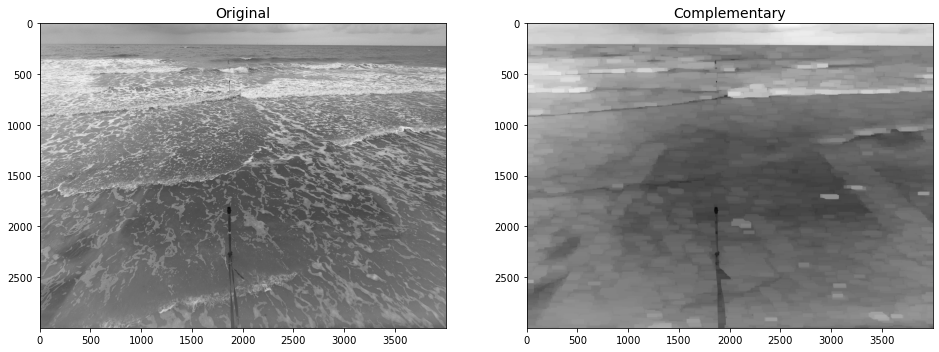

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 8))
ax[0].set_title('Original',fontsize = 14)
ax[0].imshow(images[seq], cmap='gray')
ax[1].set_title('Complementary',fontsize = 14)
ax[1].imshow(images[seq] - res, cmap='gray')

# Canny Edge Detection

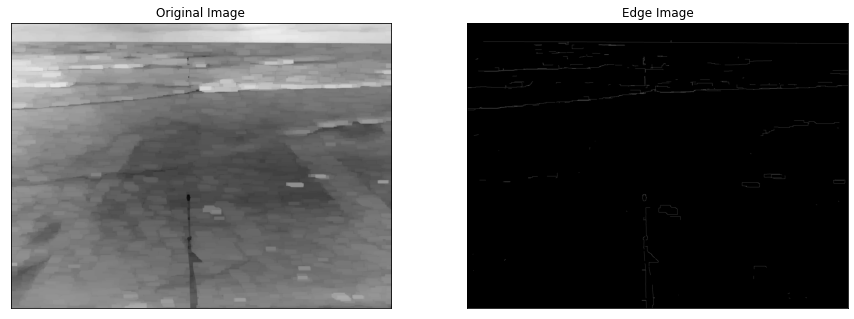

In [8]:
new_images = images[seq] - res
assert new_images is not None, "file could not be read, check with os.path.exists()"
edges = cv2.Canny(new_images,50,100)
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(new_images,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Color-Inverted Image')

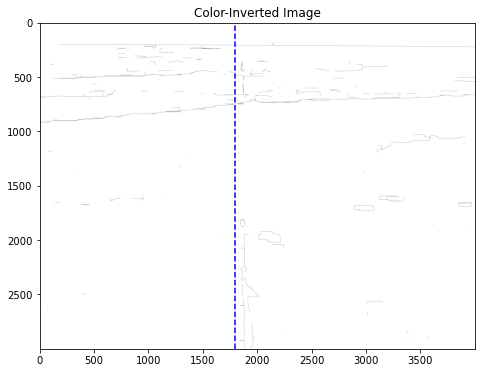

In [9]:
edge_invert = 255 - edges
plt.figure(figsize = (10,6))
plt.imshow(edge_invert,cmap = 'gray')
plt.axvline(x=col, color = 'blue', linestyle = '--',label = 'Target Column')
plt.title("Color-Inverted Image")

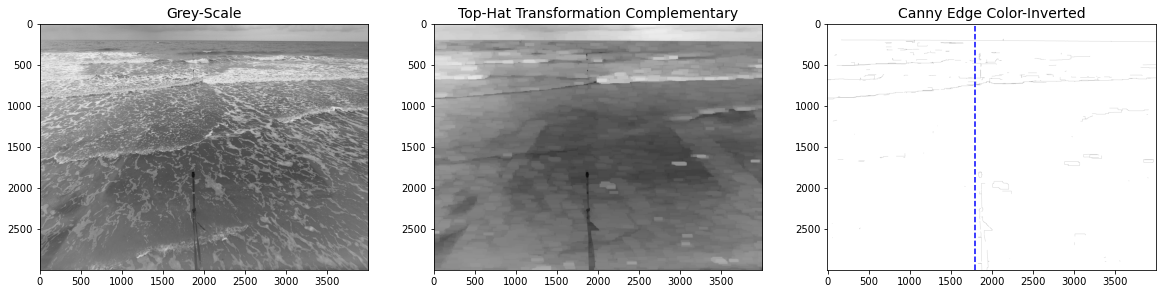

In [10]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 8))
ax[0].set_title('Grey-Scale',fontsize = 14)
ax[0].imshow(images[seq], cmap='gray')
ax[1].set_title('Top-Hat Transformation Complementary',fontsize = 14)
ax[1].imshow(images[seq] - res, cmap='gray')
ax[2].set_title("Canny Edge Color-Inverted",fontsize = 14)
ax[2].imshow(edge_invert,cmap = 'gray')
ax[2].axvline(x=col, color = 'blue', linestyle = '--',label = 'Target Column')

In [11]:
# assert images[seq] is not None, "file could not be read, check with os.path.exists()"
# edges_withoutprocessing = cv2.Canny(images[seq],50,200)
# plt.figure(figsize=(16,10))
# plt.subplot(121),plt.imshow(images[0],cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edges_withoutprocessing,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
# plt.show()

(array([211, 489, 668, 714, 750], dtype=int64),)


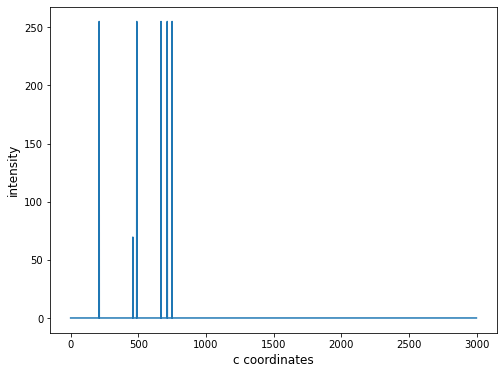

In [12]:
BLdetect = []
for i in range(-5,6):
    BLdetect.append(edges[:,col+i])
BLdetect_trans = np.transpose(BLdetect)    
BLdetect_ave = np.mean(BLdetect_trans, axis=1)
plt.figure(figsize = (8,6))
plt.plot(range(c_num),BLdetect_ave, label = '0 s')
plt.xlabel("c coordinates", fontsize = 12)
plt.ylabel("intensity", fontsize = 12)
k = np.where(BLdetect_ave>100)
print(k)

Text(0.5, 1.0, 'Raw Wave Image')

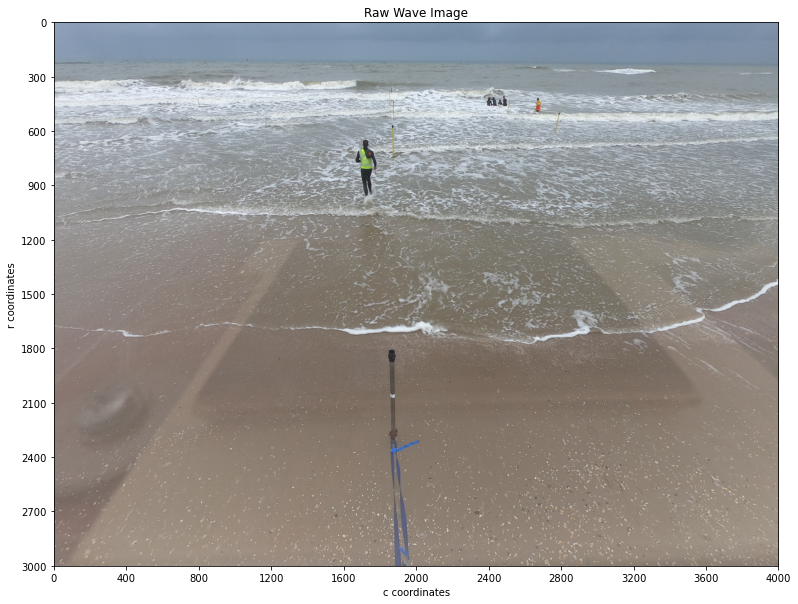

In [13]:
# RGBimages = cv2.imread("gopro_data/test/G0021590.JPG")
RGBimages = cv2.imread("gopro_data/test/G0012031.JPG")
RGBimages = cv2.cvtColor(RGBimages, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (14,10))
plt.imshow(RGBimages)
plt.xticks(xrange)
plt.yticks(yrange)
plt.xlabel("c coordinates")
plt.ylabel("r coordinates")
plt.title("Raw Wave Image")

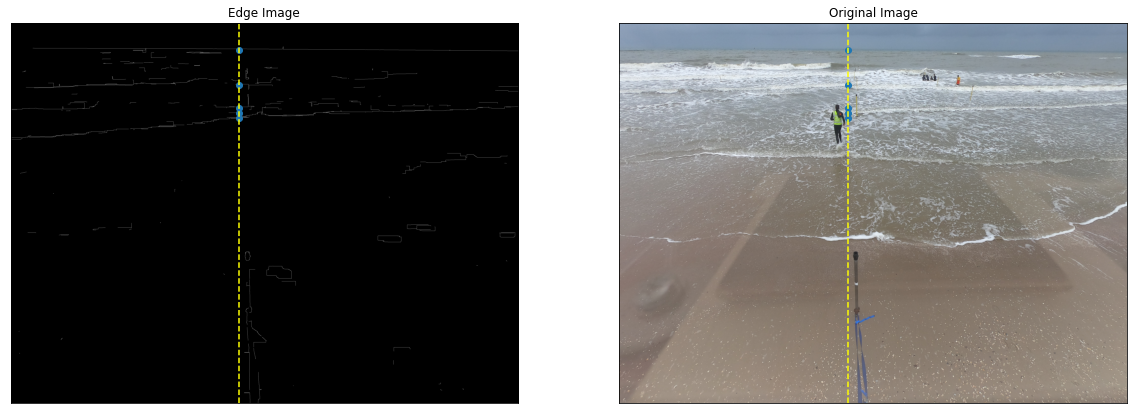

In [14]:
plt.figure(figsize=(20,14))

plt.subplot(121)
plt.scatter(np.ones(len(k[0]))*1800,k[0])
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.axvline(x=col, color = 'yellow', linestyle = '--')

plt.subplot(122)
plt.imshow(RGBimages,cmap = 'gray')
plt.scatter(np.ones(len(k[0]))*1800,k[0])
plt.axvline(x=col, color = 'yellow', linestyle = '--')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
def imageprocess(image,fd = 30,fu = 100,Cannyd = 50,Cannyu = 100,aved = -5,aveu = 6,threshold = 100):
    # White Top-hat Transformation
    footprint = morphology.rectangle(fd,fu)
    res = morphology.white_tophat(image, footprint)
    new_image = image - res
    # Canny Edge Detection
    assert new_image is not None, "file could not be read, check with os.path.exists()"
    edges = cv2.Canny(new_image,Cannyd,Cannyu)
    # Calculate Breaking Location by averaging assigned multiple columns
    BLdetect = []
    for i in range(aved,aveu):
        BLdetect.append(edges[:,col+i])
    BLdetect_trans = np.transpose(BLdetect)    
    BLdetect_ave = np.mean(BLdetect_trans, axis=1)
    # Return Breaking Location which exceed threshold
    k = np.where(BLdetect_ave>threshold)
    k = k[0]
    
    # Average and pinpoint one specific coordinates from the Returned Breaking Points
    ranges =[]
    for k,g in groupby(enumerate(k),lambda x:x[0]-x[1]):
        group = (map(itemgetter(1),g))
        group = list(map(int,group))
        ranges.append((group[0],group[-1]))
    e = []
    for i in range(len(ranges)):
        seq = np.arange(ranges[i][0],ranges[i][1]+1)
        e.append(int(sum(seq)/len(seq)))
    
    return e

In [16]:
d = imageprocess(images[seq],fd = 50,fu = 150,Cannyd = 50,Cannyu = 190)

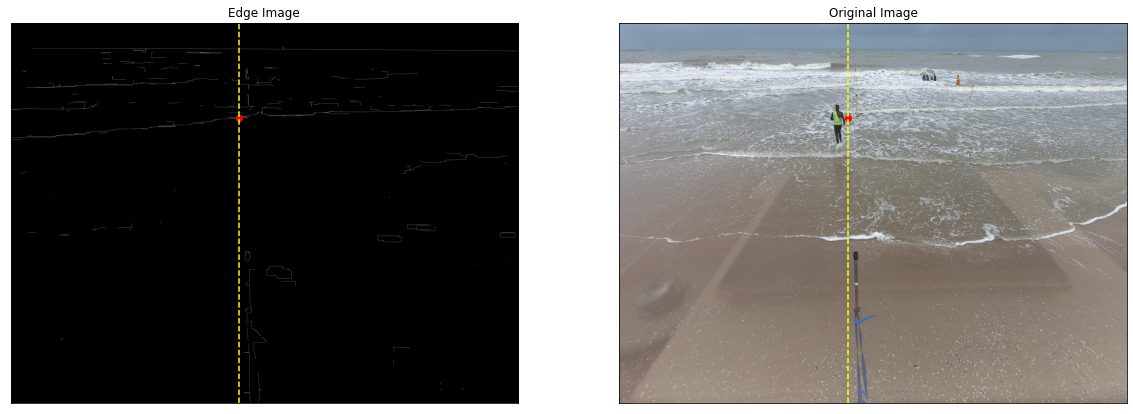

In [17]:
plt.figure(figsize=(20,14))

plt.subplot(121)
plt.scatter(np.ones(len(d))*1800,d, color = 'red')
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.axvline(x=col, color = 'yellow', linestyle = '--')

plt.subplot(122)
plt.imshow(RGBimages,cmap = 'gray')
plt.scatter(np.ones(len(d))*1800,d, color = 'red')
plt.axvline(x=col, color = 'yellow', linestyle = '--')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
# print(len(allfiles))
# print(len(images))

In [19]:
breakseq = []
[breakseq.append(imageprocess(images[i],fd = 50,fu = 100,Cannyd = 50,Cannyu = 100)) for i in range(len(allfiles))]
display(breakseq)

[[211, 460, 489, 668, 750, 759],
 [212, 499, 693, 780, 787],
 [212, 501, 508, 733, 738, 813],
 [212, 512, 516, 778, 780],
 [212, 523, 527, 823],
 [212, 879],
 [211, 401, 931, 1012],
 [212, 558, 1031, 1082, 1096, 1102, 1105, 2188],
 [212, 563, 1175, 1192],
 [212, 574, 1274],
 [211, 441, 581, 588, 1377, 1389],
 [212, 1514],
 [212, 621, 1671],
 [212, 638, 1889],
 [212, 359, 366, 447, 649, 654, 658, 2191, 2246],
 [212, 380, 677, 2224, 2296, 2437],
 [212, 522, 525, 702],
 [211, 450, 534, 537, 715, 718, 2398],
 [212, 546, 549, 740, 744],
 [212, 562, 569, 756, 2496],
 [212, 568, 577, 773, 2722],
 [211, 424, 578, 795],
 [212, 411, 438, 592, 816],
 [211, 446, 603],
 [212, 380, 859],
 [211, 678],
 [212, 711, 715, 900],
 [211, 373, 739, 745],
 [212, 414, 419, 764, 1573, 1631],
 [211, 424, 430, 490, 803],
 [211, 499, 832],
 [211, 440, 444, 507, 873, 876],
 [212, 447, 455, 910],
 [211, 334, 454, 457, 460, 526, 572, 934],
 [211, 539, 571, 579],
 [212, 474, 480, 584, 586, 588, 601, 1078, 2562, 2564],

In [20]:
def breaking_points_check(images, point, init = 0, seq = 1):
    """
    This function examine the image by depicting the detected breaking wave location.
    images: the caculated location of the breaking wave
    point: breaking location
    init: firist frame to be examined
    seq: final frame to be examined
    """
    dx = []
    for i in range(len(point)):
        dx.append(np.ones(len(point[i]))*1800)
    def _show(frame = (init, seq)):
        plt.figure(figsize = (10,8))
        plt.plot(dx[frame],point[frame],'r+')
        plt.imshow(images[frame],cmap = 'gray')
    return interact(_show)

In [21]:
breaking_points_check(images, breakseq, init = 0, seq = 239)

interactive(children=(IntSlider(value=119, description='frame', max=239), Output()), _dom_classes=('widget-int…

<function __main__.breaking_points_check.<locals>._show(frame=(0, 239))>

In [22]:
def remove_outlier(lower,upper,data):
    a = []
    for i in data:
        if i < upper and i > lower:
                a.append(i)
    return a

In [23]:
reakseq_new = []
ub = 250
lb = 3000
breakseq_new = [remove_outlier(ub,lb,breakseq[i]) for i in range(len(breakseq))]
display(breakseq_new)

[[460, 489, 668, 750, 759],
 [499, 693, 780, 787],
 [501, 508, 733, 738, 813],
 [512, 516, 778, 780],
 [523, 527, 823],
 [879],
 [401, 931, 1012],
 [558, 1031, 1082, 1096, 1102, 1105, 2188],
 [563, 1175, 1192],
 [574, 1274],
 [441, 581, 588, 1377, 1389],
 [1514],
 [621, 1671],
 [638, 1889],
 [359, 366, 447, 649, 654, 658, 2191, 2246],
 [380, 677, 2224, 2296, 2437],
 [522, 525, 702],
 [450, 534, 537, 715, 718, 2398],
 [546, 549, 740, 744],
 [562, 569, 756, 2496],
 [568, 577, 773, 2722],
 [424, 578, 795],
 [411, 438, 592, 816],
 [446, 603],
 [380, 859],
 [678],
 [711, 715, 900],
 [373, 739, 745],
 [414, 419, 764, 1573, 1631],
 [424, 430, 490, 803],
 [499, 832],
 [440, 444, 507, 873, 876],
 [447, 455, 910],
 [334, 454, 457, 460, 526, 572, 934],
 [539, 571, 579],
 [474, 480, 584, 586, 588, 601, 1078, 2562, 2564],
 [479, 484, 634, 1152, 1155, 1838],
 [494, 497, 666, 1233, 1742, 1803, 1807, 1813],
 [494, 502, 701, 1308, 1313, 1800],
 [408, 520, 734, 742, 1426, 1791, 1794, 1796],
 [536, 760, 

# Zoom in function (unsolved)

In [24]:
base_img = RGBimages
ref = []
img = base_img
zoom = 1
min_zoom = 1
max_zoom = 5

def select_roi(event, x, y, flags, param):
    global base_img, zoom, min_zoom, max_zoom, ref
    if event == cv2.EVENT_MOUSEWHEEL:
        if flags > 0:
            zoom *= 1.1
            zoom = min(zoom, max_zoom)
        else:
            zoom /= 1.1
            zoom = max(zoom, min_zoom)

        img = base_img.copy()

        # Calculate zoomed-in image size
        new_width = round(img.shape[1] / zoom)
        new_height = round(img.shape[0] / zoom)

        # Calculate offset
        x_offset = round(x - (x / zoom))
        y_offset = round(y - (y / zoom))

        # Crop image
        img = img[y_offset : y_offset + new_height,
                  x_offset : x_offset + new_width]

        # Stretch image to full size
        img = cv2.resize(img, (base_img.shape[1], base_img.shape[0]))
        cv2.imshow("Selected area", img)
        
    if event == 1:
        ref.append([x, y])
        
cv2.namedWindow("Selected area",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("Selected area", select_roi)
# cv2.setMouseCallback('image', mouse_click )
cv2.imshow("Selected area", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[1865  569]
 [1875  434]
 [1848  377]
 [1865  360]
 [1881  340]]


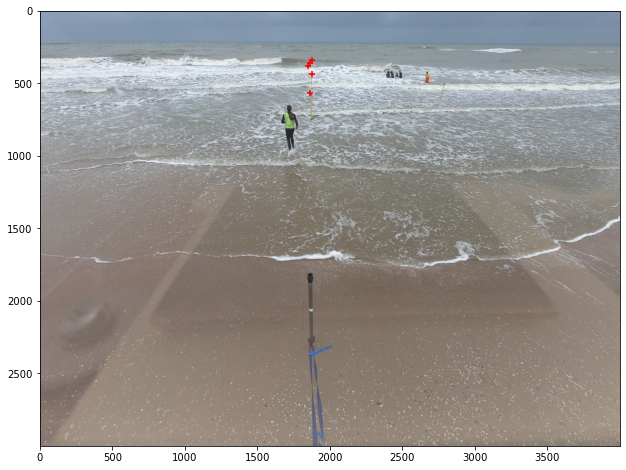

In [25]:
ref = np.array(ref)
plt.figure(figsize = (12,8))
plt.imshow(RGBimages)
plt.scatter(ref[:,0],ref[:,1],c = 'r', marker = '+')
print(ref)

# Coordinate Convertion

In [26]:
GPS = pd.read_csv(('gps_data/coordinates.txt'), delimiter=',')
display(GPS)

,X,Y,Z,Accuracy,labels
0,72422.984,452119.801,0.827,0.010,GoPro
1,72409.749,452131.948,0.321,0.010,1
2,72399.133,452141.747,0.029,0.010,2
3,72390.365,452149.361,-0.124,0.009,3
4,72381.722,452157.418,-0.487,0.010,4
5,72373.330,452166.208,-0.750,0.010,5
6,72364.268,452173.996,-1.246,0.014,6
7,72397.936,452156.630,-0.121,0.013,Ref


In [27]:
# Pairing the corresoonding image points and GPS Data 
reference_points = ref
real_points = np.array([GPS['X'][1:6], GPS['Y'][1:6]]).T

head = np.array([72420.368,452122.958]) # Assume this data is the auxiliary pole
real_points_fake = np.vstack((head,real_points))

print(reference_points)
print(real_points)

[[1865  569]
 [1875  434]
 [1848  377]
 [1865  360]
 [1881  340]]
[[ 72409.749 452131.948]
 [ 72399.133 452141.747]
 [ 72390.365 452149.361]
 [ 72381.722 452157.418]
 [ 72373.33  452166.208]]


C:\Users\sagi8\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<Figure size 432x288 with 0 Axes>

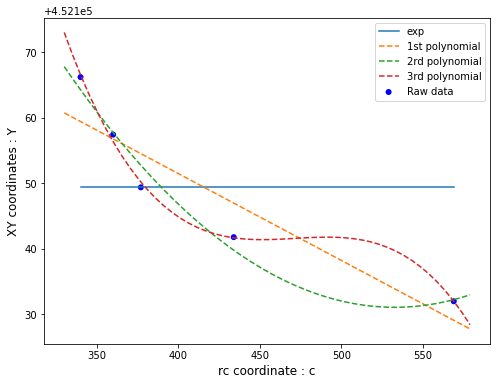

In [28]:
%run -i single_conservation
p_1, p_2, p_3 = single_conversion(reference_points,real_points)

In [29]:
print(p_1)

 
-0.1327 x + 4.522e+05


# Wave Bore Velocity Calculation  

In [30]:
def vplot(data, Hz, init, end, ref_point, mode = 0):
    '''
    This function is used to depict the time series of white pixel signal movement. 
    Note that it is specific for the data sorce which is column data.
    Hz: sampling frequency.
    init: sequence of the acquired first importing images.
    end: sequence of the acquired end importing images.
    '''
    
    N = len(data)
    data = data[init:end]
    endtime = end/Hz
    init_time = init/Hz
    timeseries = np.arange(init_time,endtime,1/Hz)
    t = []
    for i in range(len(data)):
        t.append(np.ones(len(data[i]))*timeseries[i])
    
    ref = ref_point[:,1]
    color = cm.viridis(np.linspace(0, 1, len(ref)))
    
    if mode == 0:
        plt.figure(figsize = (10,6))
        for i in range(len(data)):
            plt.scatter(t[i],data[i], marker = '.', color = 'b')
        plt.title("Time Serie of Detected Wave Bore Location")
        plt.xlabel("time [s]", fontsize=12)
        plt.ylabel("C [pixel] (image coordinates)", fontsize=12)
        plt.gca().invert_yaxis()
        plt.show()
        
    elif mode == 1:
        plt.figure(figsize = (10,6))
        for i in range(len(data)):
            plt.scatter(t[i],data[i], marker = '.', color = 'b')
        for i in range(len(ref)):
            plt.axhline(y=ref[i], color= color[i], linestyle='--', alpha = 1, label = f'GCP {i+1}')
        plt.scatter(t[0],data[0], marker = '.', color = 'b',label = 'Detected Wave Bore')
        plt.legend()
        plt.title("Time Serie of Detected Wave Bore Location")
        plt.xlabel("time [s]", fontsize=12)
        plt.ylabel("C [pixel] (image coordinates)", fontsize=12)
        plt.gca().invert_yaxis()
        plt.show()
        
    else:
        pass
    return t,data


In [31]:
Seq_Time = 240

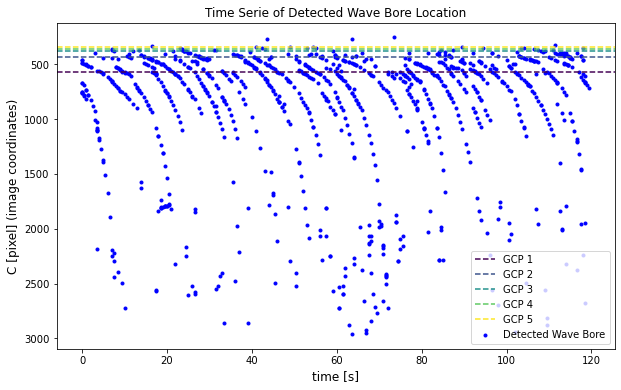

In [32]:
t,datapoints = vplot(breakseq_new, f, 0, 240, reference_points, mode = 1)

In [34]:
def linear(x1,y1,x2,y2):
    m = (y2-y1)/(x2-x1)
    h = y1 - (y2 - y1) / (x2 - x1) *x1
    return m,h

In [35]:
m0,h0 = linear(40,680,50,1680)
x0_init = 0
x0_end = 54
x0 = np.arange(x0_init,x0_end,1/f)
y0 = m0*x0 + h0

m1,h1 = linear(43,570,53,1080)
x1_init = 0
x1_end = 54
x1 = np.arange(x1_init,x1_end,1/f)
y1 = m1*x1 + h1

x = [x0, x1]
y = [y0, y1]

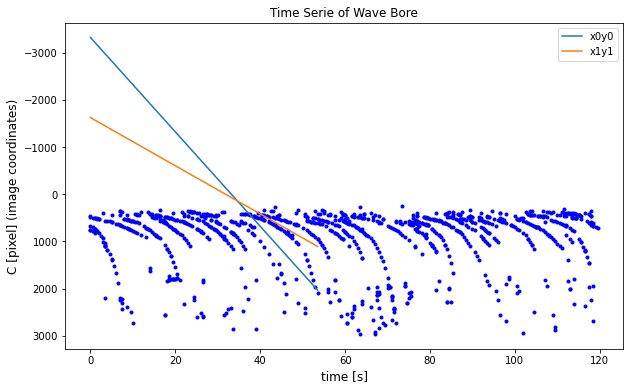

In [36]:
# plt.figure(figsize = (10,6))
# for i in range(len(datapoints)):
#     plt.scatter(t[i],datapoints[i], marker = '.', color = 'b')

# for i in range(len(x)):
#     plt.plot(x[i],y[i],label = f'x{i}y{i}')


# plt.title("Time Serie of Wave Bore")
# plt.xlabel("time [s]", fontsize=12)
# plt.ylabel("C [pixel] (image coordinates)", fontsize=12)
# plt.gca().invert_yaxis()
# plt.legend()
# plt.show()

In [37]:
# Return the datapoints within the interval

def datafilter(datapoints, y_low, y_up):
    d = []
    for point in datapoints:
        if y_up[i] > point and point > y_low[i]:
            d.append(point)
    return d

mod_datapoints = []
for i in range(x0_init,int(x0_end/(1/f))):
    mod_datapoints.append(datafilter(datapoints[i], y1, y0))

# display(mod_datapoints)

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [427],
 [],
 [466, 468, 479],
 [483, 493],
 [496],
 [506],
 [522, 531],
 [536, 547],
 [],
 [575, 584],
 [602],
 [626, 632],
 [647, 660],
 [686, 690],
 [709],
 [738, 744],
 [774],
 [814],
 [786, 840, 843, 849],
 [891, 893],
 [867, 931],
 [],
 [1018],
 [1046],
 [],
 [],
 [1270],
 [1390, 1400],
 [1523],
 [1658],
 [1814],
 [1970],
 []]

# Convert to Real Coordinates

In [38]:
def convertion(reference,real,data):
    z_convert = np.polyfit(reference,real, 1)
    p_convert = np.poly1d(z_convert)
    Y = p_convert(data)
    return Y

In [39]:
Y = [convertion(reference_points[:,1],real_points[:,1],mod_datapoints[i]) for i in range(len(mod_datapoints))]
for i in range(len(Y)):
    Y[i] = Y[i].tolist()
Y1 = Y    

# Velocity on Real Coordinates 

In [40]:
def vplot_real(data, Hz, init, end, mode = 0):
    '''
    This function is used to depict the time series of white pixel signal movement. 
    Note that it is specific for the data sorce which is column data.
    Hz: sampling frequency.
    init: sequence of the acquired first importing images.
    end: sequence of the acquired end importing images.
    '''
    N = len(data)
    data = data[init:end]
    endtime = end/Hz
    init_time = init/Hz
    timeseries = np.arange(init_time,endtime,1/Hz)
    t = []
    for i in range(len(data)):
        t.append(np.ones(len(data[i]))*timeseries[i])
        
    if mode == 0:
        plt.figure(figsize = (10,6))
        for i in range(len(data)):
            plt.scatter(t[i],data[i], marker = '.', color = 'b')
        plt.title("Time Serie of Detected Wave Bore Location")
        plt.xlabel("time [s]", fontsize=12)
        plt.ylabel("Y [m] (Real coordinates)", fontsize=12)
        plt.show()
    else:
        pass
    return t,data

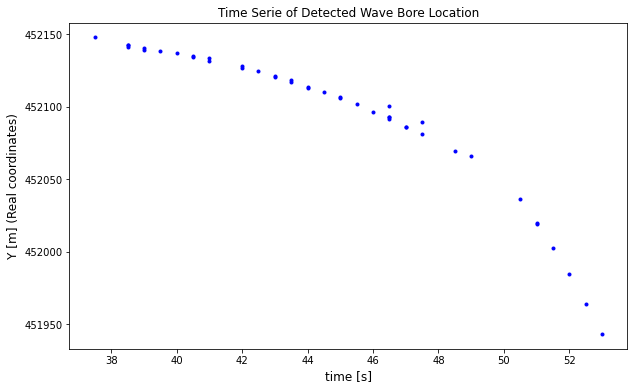

[-9.41896595e-01  7.42046481e+01  4.50677326e+05]


In [41]:
t_0_1,datapoints_0_1 = vplot_real(Y1, f, 0, Seq_Time, mode = 0)

for i in range(len(t_0_1)):
    t_0_1[i] = t_0_1[i].tolist()

flat_t_0_1 = [item for sublist in t_0_1 for item in sublist]
flat_datapoints_0_1 = [item for sublist in datapoints_0_1 for item in sublist]

z_2 = np.polyfit(flat_t_0_1, flat_datapoints_0_1, 2)
print(z_2)
p_2 = np.poly1d(z_2)


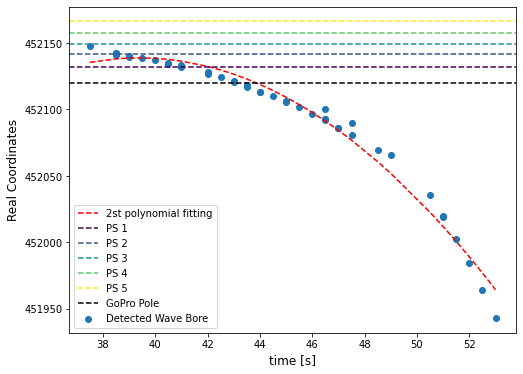

In [42]:
color = cm.viridis(np.linspace(0, 1, len(ref)))
GoPro = np.array(GPS['Y'][0])
realpoints = real_points[:,1]
plt.figure(figsize = (8,6))
plt.scatter(flat_t_0_1,flat_datapoints_0_1, label = 'Detected Wave Bore')
# plt.gca().invert_yaxis()
plt.ylabel("Real Coordinates", fontsize = 12)
plt.xlabel("time [s]",fontsize = 12)
plt.plot(flat_t_0_1, p_2(flat_t_0_1), 'r--', label = '2st polynomial fitting')
for i in range(len(real_points)):
    plt.axhline(y=realpoints[i], color= color[i], linestyle='--', alpha = 1, label = f'PS {i+1}')
plt.axhline(y=GoPro, color= 'k', linestyle='--', alpha = 1, label = 'GoPro Pole')    
plt.legend()

In [43]:
print(realpoints[0])

t_corr = (-z_2[1] - np.sqrt(z_2[1]**2 - 4*z_2[0]*(z_2[2] - realpoints[0])))/(2*z_2[0]) 
print(t_corr)

452131.948
42.09351717828776


In [44]:
from sympy import *
x = Symbol('x')
y = z_2[0]*x**2 + z_2[1]*x + z_2[2]
yprime = y.diff(x)
print(yprime)

74.2046481248056 - 1.88379318931932*x


Note that the following variabes should be changed with wave data

In [45]:
velocity1 = lambdify(x, yprime, 'numpy')
first1 = np.min(np.nonzero(Y1))
last1 = np.max(np.nonzero(Y1))

C:\Users\sagi8\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [46]:
realvelocity1 = velocity1(t_corr)
print(realvelocity1)

-5.090832850148686


In [48]:
# rvelocity = [realvelocity0, realvelocity1, realvelocity2]
# rv_mean = np.mean(rvelocity) 
# print(rvelocity)

In [49]:
# error0928 = (abs(rv_mean) - 2.96) / 2.96
# print(error0928)

# Breaking Location

In [ ]:
def peak_detection(data, image, c_coordinate, Hz, threshold = -85):
    '''
    Note that using this function requires a good wwave bore detection from function "get_break_sequence"
    This fucntion is to detect the breaking location of the succesive waves from a single column.
    data: single column (specific r coordinates) with continuous time period.
    image: one image for showing the breaking points.
    threshold: c coordinate difference for breaking location iteration.
    c_coordinate: the specific column.
    '''

    # derive the furthest points
    k = []
    try:
        for i in range(len(data)):
            k.append(data[i][0])
    except IndexError:
        pass
    
    mark = []
    try:
        for i in range(len(data)-1):
            diff =  data[i+1][0][0]-data[i][0][0] 
            if diff < threshold:
                mark.append(data[i+1][0][0])         
    except IndexError:       
         pass   
            
    o = np.ones(len(mark))*c_coordinate  
  
    
    # Create time series for the furthest breaking points
    indices = []
#     a = []
#     time_br = []
    
    for i in range(len(mark)):
        indices.append([j for j, x in enumerate(k) if x == mark[i]]) 
    value = []
    mini = min(indices[0])
    mini2 = mini
    final = []
    for i in range(1,len(indices)):
        c = indices[i]
    
        def sub(a,mini):
            substract = []
            tem_storage = []
            for j in range(len(a)):
                substract.append(a[j] - mini)
                if substract[j] > 0:
                    tem_storage.append(a[j])
            return tem_storage
    
        tem_storage = sub(c, mini)
        value.append(min(tem_storage))
        mini = value[i-1]
        final.append(mini)
    final = np.hstack((mini2,final))
    time_br = final * (1/Hz)
        
    # Create time series for the all the data points
    if init == 0:
        start_time = 0
    else:
        start_time = (init-0)/Hz
        
    endtime = end/Hz
    time = np.arange(start_time, endtime, 1/Hz)
    
    
    # Depicting the breaking locations on the image 
    plt.figure(figsize = (12,8))
    plt.plot(o,mark,'b.')
    plt.imshow(image,cmap = 'gray')
    plt.show()
    
    # Depicting the breaking locations on the scatter plot for checking
    plt.figure(figsize = (12,8))
#     plt.scatter(time,k, label = 'Algorithm Detected Breaking Location')
    plt.scatter(time_br, mark, label = 'Predicted Breaking Location')
    plt.legend()
    plt.xlabel("time[s]",fontsize=12)
    plt.ylabel("C [pixel] (image coordinates)",fontsize=12)
    
    plt.gca().invert_yaxis()
    return mark

In [50]:
display(datapoints)

[[460, 489, 668, 750, 759],
 [499, 693, 780, 787],
 [501, 508, 733, 738, 813],
 [512, 516, 778, 780],
 [523, 527, 823],
 [879],
 [401, 931, 1012],
 [558, 1031, 1082, 1096, 1102, 1105, 2188],
 [563, 1175, 1192],
 [574, 1274],
 [441, 581, 588, 1377, 1389],
 [1514],
 [621, 1671],
 [638, 1889],
 [359, 366, 447, 649, 654, 658, 2191, 2246],
 [380, 677, 2224, 2296, 2437],
 [522, 525, 702],
 [450, 534, 537, 715, 718, 2398],
 [546, 549, 740, 744],
 [562, 569, 756, 2496],
 [568, 577, 773, 2722],
 [424, 578, 795],
 [411, 438, 592, 816],
 [446, 603],
 [380, 859],
 [678],
 [711, 715, 900],
 [373, 739, 745],
 [414, 419, 764, 1573, 1631],
 [424, 430, 490, 803],
 [499, 832],
 [440, 444, 507, 873, 876],
 [447, 455, 910],
 [334, 454, 457, 460, 526, 572, 934],
 [539, 571, 579],
 [474, 480, 584, 586, 588, 601, 1078, 2562, 2564],
 [479, 484, 634, 1152, 1155, 1838],
 [494, 497, 666, 1233, 1742, 1803, 1807, 1813],
 [494, 502, 701, 1308, 1313, 1800],
 [408, 520, 734, 742, 1426, 1791, 1794, 1796],
 [536, 760, 

In [ ]:
breaking_location = peak_detection(datapoints, images[0], c_coordinate=col, init=0, end = 240 , Hz = 2, threshold = -40)